In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_aistat_matplotib_rcparams()

In [4]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])

In [5]:
EXP_DIR = "../output/dimRegime-5-all"
all_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
all_output_df['Id'] = all_output_df.apply(build_Id, axis=1)
cols = [col for col in all_output_df.columns if (not col.startswith('mle')) and (not col in ['adjacency', 'dim'])]
all_output_df = all_output_df.loc[:, cols]

EXP_DIR_MLE = "../output/dimRegime-5-2nd-run-mle-only-maxiter20k/"
mle_output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR_MLE)
mle_output_df['Id'] = mle_output_df.apply(build_Id, axis=1)
mle_cols = [col for col in mle_output_df.columns if col.startswith('mle')] + ['Id', 'adjacency', 'dim']
mle_output_df = mle_output_df.loc[:, mle_cols]

output_df = pd.merge(all_output_df, mle_output_df, on='Id', how='outer',)

Process file: ../output/dimRegime-5-all/1590697291-g02-d50-n500000/output-01.json...
Process file: ../output/dimRegime-5-2nd-run-mle-only-maxiter20k/1590697291-g00-d50-n500000/output-02.json...


---

In [7]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'mle_other': 'mle_other_adjacency', 
    
    'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle                                     acc_mle_other            \
           min       max      mean       std count           min       max   
dim                                                                          
5.0   0.280000  0.960000  0.596000  0.266249    20      0.800000  1.000000   
10.0  0.500000  0.970000  0.722500  0.169826    20      0.800000  0.980000   
15.0  0.617778  0.960000  0.744444  0.125538    20      0.777778  0.915556   
20.0  0.705000  0.815000  0.748250  0.028724    20      0.845000  0.937500   
25.0  0.728000  0.968000  0.801520  0.072900    20      0.902400  0.955200   
30.0  0.762222  0.960000  0.814833  0.049942    20      0.906667  0.954444   
35.0  0.793469  0.848163  0.812612  0.015850    20      0.921633  0.956735   
40.0  0.819375  0.856875  0.836000  0.011514    15      0.927500  0.966875   
45.0  0.836049  0.861235  0.851358  0.009378    10      0.930370  0.967407   
50.0  0.859200  0.859200  0.859200       NaN     1      0.957200  0.957200   

                                ... fn_vi                               fn_gb  \
          mean       std count  ...   min   max   mean       std count    min   
dim                             ...                                             
5.0   0.914000  0.063941    20  ...   0.0   0.0   0.00  0.000000    20    0.0   
10.0  0.856000  0.047061    20  ...   0.0   1.0   0.10  0.307794    20    2.0   
15.0  0.884222  0.029813    20  ...   0.0   1.0   0.20  0.410391    20    9.0   
20.0  0.897625  0.023276    20  ...   0.0   2.0   0.65  0.670820    20   23.0   
25.0  0.931680  0.014170    20  ...   0.0   5.0   1.85  1.926956    20   31.0   
30.0  0.937944  0.013094    20  ...   0.0   7.0   2.85  2.007224    20   50.0   
35.0  0.946776  0.008226    20  ...   1.0   7.0   3.90  1.518309    20   77.0   
40.0  0.953208  0.012408    15  ...   3.0  14.0   8.00  4.187895    14  105.0   
45.0  0.952346  0.012524    10  ...   5.0  17.0  10.00  5.291503     4  133.0   
50.0  0.957200       NaN     1  ...   NaN   NaN    NaN       NaN     0    NaN   

                                          
        max        mean        std count  
dim                                       
5.0     2.0    0.900000   0.718185    20  
10.0   11.0    6.550000   2.372540    20  
15.0   22.0   16.200000   3.791958    20  
20.0   43.0   32.650000   5.382965    20  
25.0   71.0   51.100000  11.804994    20  
30.0   88.0   68.900000  11.327191    20  
35.0  107.0   92.750000   8.704959    20  
40.0  144.0  120.285714  12.748626    14  
45.0  164.0  142.250000  14.773287     4  
50.0    NaN         NaN        NaN     0  

[10 rows x 350 columns]

In [8]:
plot_df[[col for col in plot_df.columns if col[0].startswith('runtime_log')]]

runtime_log_mle                                      \
                 min       max      mean       std count   
dim                                                        
5.0        -0.170841  1.206215  0.462718  0.496455    20   
10.0        0.323455  1.727161  1.072645  0.528471    20   
15.0        0.771765  2.066806  1.343403  0.436768    20   
20.0        1.150985  1.703852  1.342898  0.131978    20   
25.0        1.298457  2.473239  1.681157  0.387848    20   
30.0        1.438739  2.651943  1.761662  0.334053    20   
35.0        1.522205  2.187165  1.820873  0.220201    20   
40.0        1.695418  2.030502  1.858337  0.100916    15   
45.0        1.813550  2.181353  1.994792  0.127962    10   
50.0        1.958080  1.958080  1.958080       NaN     1   

     runtime_log_mle_other                                      ...  \
                       min       max      mean       std count  ...   
dim                                                             ...   
5.0               1.032958  1.150588  1.085285  0.036793    20  ...   
10.0              0.687271  1.650966  1.564838  0.210116    20  ...   
15.0              1.900301  2.010902  1.961166  0.031526    20  ...   
20.0              2.073863  2.174778  2.124446  0.024632    20  ...   
25.0              1.406121  2.411411  2.314751  0.215803    20  ...   
30.0              2.418237  2.557653  2.510573  0.028039    20  ...   
35.0              2.521886  2.641749  2.596951  0.030401    20  ...   
40.0              2.535122  2.738663  2.664698  0.077167    15  ...   
45.0              2.768808  2.871938  2.842091  0.034334    10  ...   
50.0              2.813059  2.813059  2.813059       NaN     1  ...   

     runtime_log_vi                                     runtime_log_gb  \
                min       max      mean       std count            min   
dim                                                                      
5.0       -1.030662 -0.769061 -0.874227  0.067231    20      -0.401058   
10.0      -0.299329 -0.170004 -0.251475  0.031615    20      -0.050195   
15.0       0.035200  0.254118  0.136818  0.053993    20       0.152472   
20.0       0.354676  0.561496  0.445458  0.057918    20       0.297696   
25.0       0.611217  0.858520  0.737206  0.062207    20       0.408497   
30.0       0.818515  1.011276  0.905777  0.058052    20       0.497258   
35.0       0.965076  1.104916  1.025095  0.035688    20       0.567173   
40.0       0.989744  1.137702  1.101078  0.038262    14       0.599580   
45.0       1.166393  1.187978  1.176514  0.008864     4       0.709190   
50.0            NaN       NaN       NaN       NaN     0            NaN   

                                          
           max      mean       std count  
dim                                       
5.0  -0.344248 -0.372481  0.016824    20  
10.0  0.063931 -0.015504  0.036917    20  
15.0  0.253414  0.197081  0.032187    20  
20.0  0.400005  0.335850  0.026589    20  
25.0  0.506277  0.441952  0.029309    20  
30.0  0.635075  0.538575  0.034820    20  
35.0  0.788185  0.625397  0.053860    20  
40.0  0.747542  0.667423  0.036859    14  
45.0  0.756483  0.722554  0.022687     4  
50.0       NaN       NaN       NaN     0  

[10 rows x 25 columns]

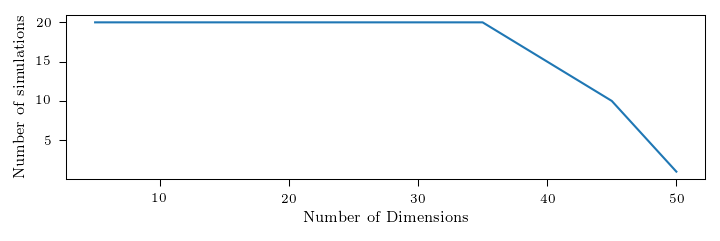

In [9]:
plt.figure(figsize=(5.5, 1.45))
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

f1score
relerr
runtime_log
runtime_lin
precAt5
precAt10
precAt20
precAt50
num_iter


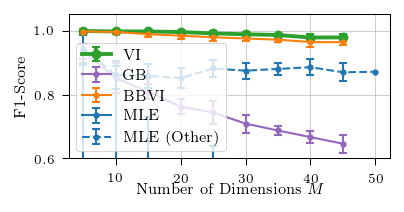

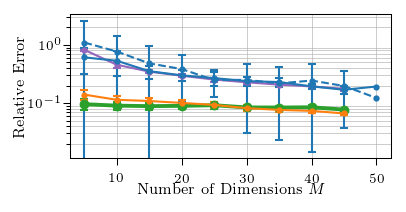

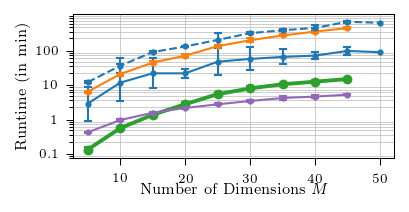

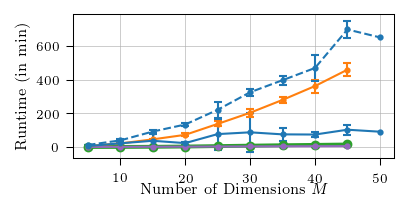

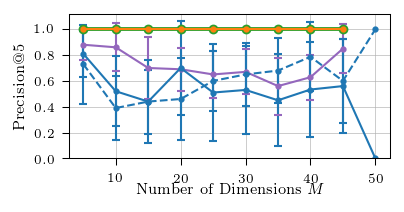

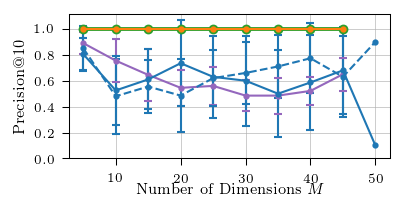

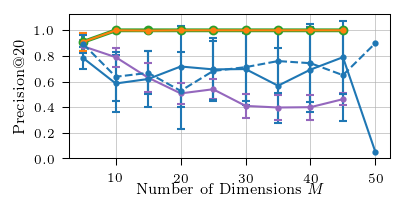

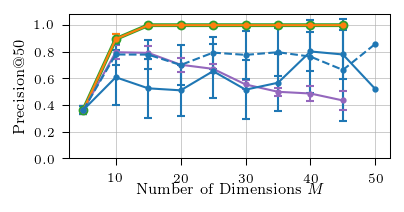

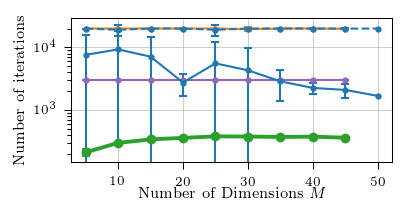

In [12]:
tsvar.plotting.set_aistat_matplotib_rcparams()

# List the metrics to plots:
# --------------------------
#   (metric_name, label)
plot_meta_data = [
    ('f1score',     'F1-Score',         ), 
    ('relerr',      'Relative Error',   ),
    ('runtime_log', 'Runtime (in min)', ),
    ('runtime_lin', 'Runtime (in min)', ),
        
    ('precAt5',     'Precision@5',      ),
    ('precAt10',    'Precision@10',     ),
    ('precAt20',    'Precision@20',     ),
    ('precAt50',    'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
    
    ('num_iter', 'Number of iterations'), 
]

# List the methods to plots:
# --------------------------
#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
    ('mle_other',  'MLE (Other)',   'C0', '--',  1.0), 
]

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(5.5/2 - 0.2, 1.25))
    plt.grid()
    
    if prefix == 'runtime_log':
        #ax = plt.gca()
        #new_ax = plt.twinx()
        #plt.sca(new_ax)
        #plt.grid(False)
        pass
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    if prefix == 'runtime_log':
        #plt.yticks([], [])
        #plt.sca(ax)
        pass
    
    plt.xlabel(f'Number of Dimensions $M$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0.6)
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log', basey=10, nonposy='clip')
        #plt.ylim(bottom=1e-3)
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass

    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)

    if prefix.startswith('num_iter'):
        plt.yscale('log', basey=10, nonposy='clip');
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
    plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}.pdf', dpi=72, )
    plt.close()

---

### Varying threshold

In [41]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi': 'bbvi_adj_mean', 
    'vi': 'vi_adj_mean',
    'gb': 'gb_adj_normed',
}


data_thresh_list = list()
thresh_range = np.linspace(0.0, 0.1, 11)
for thresh in thresh_range:
    print(thresh)
    this_plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col=None, threshold=thresh)
    this_plot_df['threshold'] = thresh
    data_thresh_list.append(this_plot_df.copy())
    
all_df_thresh = pd.concat(data_thresh_list)

# Keep only dim=10
all_df_thresh = all_df_thresh.loc[all_df_thresh['dim'] == 10]
    
plot_df_thresh = all_df_thresh.groupby('threshold').agg(['mean', 'std'])

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


In [42]:
plot_df_thresh

mle_conv           mle_num_iter              bbvi_conv      vi_conv      gb_conv       ... runtime_log_gb           num_iter_mle              num_iter_bbvi      num_iter_vi            num_iter_gb     
              mean       std         mean          std      mean  std    mean  std    mean  std  ...           mean       std         mean          std          mean  std        mean        std        mean  std
threshold                                                                                        ...                                                                                                              
0.00           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.01           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.02           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.03           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.04           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.05           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.06           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.07           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.08           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.09           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0
0.10           0.6  0.502625         9305  8990.607672     False  0.0    True  0.0    True  0.0  ...      -0.015504  0.036917         9305  8990.607672         20000  0.0       303.5  14.244112        3000  0.0

[11 rows x 130 columns]

In [47]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'f1score'


plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Threshold $\eta$', labelpad=0)
plt.ylabel('F1-Score', labelpad=3);
    
for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])

    plt.errorbar(plot_df_thresh[col].index, plot_df_thresh[col]['mean'], yerr=plot_df_thresh[col]['std'], 
                 label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                 marker='o', markersize=2*lw)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend(loc='lower right', prop={'size': 7})
plt.ylim(bottom=0)

plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-threshold.pdf')
plt.close()

---

### Numer of iterations

In [58]:
for suf in ['vi', 'gb', 'bbvi', 'mle']:
    output_df[f'num_iter_log_{suf}'] = output_df[f'num_iter_{suf}'].apply(np.log10)

In [63]:
num_iter_cols = [f'num_iter_log_{suf}' for suf in ['vi', 'gb', 'bbvi', 'mle']] 
num_iter_plot_df = output_df[num_iter_cols + ['dim']].groupby('dim').agg(['mean', 'std'])

In [94]:
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]
prefix = 'num_iter_log'

plt.figure(figsize=(5.5/2 - 0.2, 1.25))
plt.grid()
plt.xlabel(f'Number of dimensions $M$', labelpad=0)
plt.ylabel('Number of iterations \n performed', labelpad=3);
    

for suf, label, color, ls, lw in queries_list:
    col = '_'.join([prefix, suf])
    
    plt.errorbar(num_iter_plot_df[col].index, num_iter_plot_df[col]['mean'], yerr=num_iter_plot_df[col]['std'], 
             label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
             marker='o', markersize=2*lw)
    
    plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
        np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [10000, 1000, 100]]))))
    plt.grid(which='both', axis='y')

    plt.yticks([2, 3, 4], ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])

    
#plt.legend(loc='upper left', prop={'size': 7})
#plt.ylim(bottom=10);

plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.99, top=0.97, bottom=0.2)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}-num-iter.pdf')
plt.close()